<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_10/01_Data_Modeling_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Three hands-on projects to enhance your understanding of data modeling concepts**

### **Conceptual Data Model:**
- This high-level model provides an abstract view of the data structure without getting into technical details.
- It focuses on defining the entities, their attributes, and their relationships.

#### **Logical Data Model:**
- A logical data model is more detailed, focusing on the specific structures within a database.
- It defines the schema, including tables, columns, and data types.

#### **Physical Data Model:**
- The physical data model implements the logical model in a database management system (DBMS).



# <font color='orange'> **Project 1: Building a Relational Database Model for an E-Commerce Platform**

## Overview
In this project, you will build a relational database model for an e-commerce platform. The platform will manage products, customers, orders, and payments. This project is suitable for beginners familiar with SQL and Python's `sqlite3` library.

## Key Concepts
- **Entities and Relationships**: Identify the key entities (e.g., Products, Customers, Orders) and their relationships.
- **Normalization**: Apply normalization rules to avoid redundancy and ensure data integrity.
- **SQL Queries**: Write SQL queries using Python's `sqlite3` library to interact with the database.

## Step-by-Step Guide

### 1. Define the Entities
Start by identifying the entities involved in the e-commerce platform. For example:
- `Product`: Represents items for sale.
- `Customer`: Represents users who purchase products.
- `Orders`: Represents a purchase made by a customer.
- `Payment`: Represents payment information for an order.

### 2. Create the Database Schema
Use Python to define the schema for each entity and their relationships. For example:

In [2]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE Product (
    product_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    price REAL NOT NULL
)
''')

cursor.execute('''
CREATE TABLE Customer (
    customer_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL
)
''')

cursor.execute('''
CREATE TABLE Orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    order_date TEXT NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
)
''')

cursor.execute('''
CREATE TABLE Payment (
    payment_id INTEGER PRIMARY KEY,
    order_id INTEGER,
    amount REAL NOT NULL,
    payment_date TEXT NOT NULL,
    FOREIGN KEY (order_id) REFERENCES Orders(order_id)
)
''')

# Commit changes and close connection
conn.commit()
conn.close()


### 3. Populate the Database: Insert sample data into your database using Python.

In [1]:
! pip install faker --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.2 MB/s eta 0:00:00


In [3]:
from faker import Faker
import random
from datetime import datetime, timedelta

# Faker 인스턴스 생성
fake = Faker('ko_KR')  # 한국어 데이터 생성

# 데이터베이스 연결
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()

# 1. Product 데이터 삽입 (50개 상품)
products = []
product_categories = ['전자제품', '의류', '도서', '화장품', '식품', '가구', '스포츠용품']
for i in range(1, 51):
    name = f"{random.choice(product_categories)} - {fake.word()}"
    price = round(random.uniform(10000, 500000), -3)  # 10,000원 ~ 500,000원
    products.append((i, name, price))
    cursor.execute('INSERT INTO Product (product_id, name, price) VALUES (?, ?, ?)',
                  (i, name, price))

products

[(1, '스포츠용품 - iste', 160000.0),
 (2, '의류 - reprehenderit', 205000.0),
 (3, '가구 - placeat', 267000.0),
 (4, '가구 - quasi', 382000.0),
 (5, '스포츠용품 - ipsa', 22000.0),
 (6, '가구 - perferendis', 56000.0),
 (7, '화장품 - quaerat', 475000.0),
 (8, '화장품 - voluptatem', 324000.0),
 (9, '화장품 - deserunt', 299000.0),
 (10, '화장품 - corrupti', 20000.0),
 (11, '식품 - aspernatur', 222000.0),
 (12, '스포츠용품 - quo', 481000.0),
 (13, '가구 - molestias', 73000.0),
 (14, '화장품 - eius', 470000.0),
 (15, '스포츠용품 - delectus', 439000.0),
 (16, '가구 - quo', 177000.0),
 (17, '스포츠용품 - nisi', 218000.0),
 (18, '전자제품 - officiis', 351000.0),
 (19, '가구 - in', 75000.0),
 (20, '식품 - sunt', 480000.0),
 (21, '스포츠용품 - ad', 57000.0),
 (22, '식품 - explicabo', 81000.0),
 (23, '스포츠용품 - numquam', 173000.0),
 (24, '도서 - nostrum', 423000.0),
 (25, '의류 - quos', 159000.0),
 (26, '스포츠용품 - nihil', 498000.0),
 (27, '식품 - sit', 464000.0),
 (28, '화장품 - at', 358000.0),
 (29, '화장품 - impedit', 137000.0),
 (30, '화장품 - cupiditate', 163000.0),
 (31, '도서 - od

### ecommerce.db-journal 파일이 생성된 이유는 **SQLite가 트랜잭션 처리 중에 변경 사항을 임시로 기록하기 위한 저널 파일(journal file)**을 생성했기 때문

- SQLite는 데이터의 무결성과 복구 가능성을 보장하기 위해

> - INSERT, UPDATE, DELETE 등 데이터 변경이 있을 경우,
> - 해당 변경 내용을 .db-journal 파일에 임시로 저장
> - 트랜잭션이 정상적으로 완료되면 .db-journal 파일은 삭제되며,
> - 트랜잭션 중 오류가 발생하면 .db-journal 파일을 통해 롤백(rollback)

In [4]:
# 2. Customer 데이터 삽입 (100명)
customers = []
for i in range(1, 101):
    name = fake.name()
    email = fake.email()
    customers.append((i, name, email))
    cursor.execute('INSERT INTO Customer (customer_id, name, email) VALUES (?, ?, ?)',
                  (i, name, email))

# 3. Orders 데이터 삽입 (200개 주문)
orders = []
for i in range(1, 201):
    customer_id = random.randint(1, 100)
    # 최근 1년 내의 랜덤 날짜 생성
    days_ago = random.randint(0, 365)
    order_date = (datetime.now() - timedelta(days=days_ago)).strftime('%Y-%m-%d')
    orders.append((i, customer_id, order_date))
    cursor.execute('INSERT INTO Orders (order_id, customer_id, order_date) VALUES (?, ?, ?)',
                  (i, customer_id, order_date))

# 4. Payment 데이터 삽입 (각 주문당 1개의 결제)
for i in range(1, 201):
    order_id = i
    # 주문에 해당하는 상품들의 총 금액 (1-5개 상품 랜덤 선택)
    num_products = random.randint(1, 5)
    selected_products = random.sample(products, num_products)
    amount = sum(product[2] for product in selected_products)

    # 주문 날짜 가져오기
    cursor.execute('SELECT order_date FROM Orders WHERE order_id = ?', (order_id,))
    order_date = cursor.fetchone()[0]

    # 결제일은 주문일과 동일하거나 1-3일 후
    payment_date = (datetime.strptime(order_date, '%Y-%m-%d') +
                   timedelta(days=random.randint(0, 3))).strftime('%Y-%m-%d')

    cursor.execute('INSERT INTO Payment (payment_id, order_id, amount, payment_date) VALUES (?, ?, ?, ?)',
                  (i, order_id, amount, payment_date))

### **정상적으로 커밋하면(conn.commit()) .db-journal은 사라짐**

In [5]:
# 변경사항 저장 및 연결 종료
conn.commit()

### 4. Run SQL Queries: Write Python functions to execute SQL queries, such as retrieving all orders from a specific customer or calculating the total revenue.

In [6]:
# 데이터 확인
print("데이터 삽입 완료!")
print("\n=== 데이터 확인 ===")

# 각 테이블의 행 수 확인
cursor.execute('SELECT COUNT(*) FROM Product')
print(f"Product 테이블: {cursor.fetchone()[0]}개 행")

cursor.execute('SELECT COUNT(*) FROM Customer')
print(f"Customer 테이블: {cursor.fetchone()[0]}개 행")

cursor.execute('SELECT COUNT(*) FROM Orders')
print(f"Orders 테이블: {cursor.fetchone()[0]}개 행")

cursor.execute('SELECT COUNT(*) FROM Payment')
print(f"Payment 테이블: {cursor.fetchone()[0]}개 행")

# 샘플 데이터 미리보기
print("\n=== Product 샘플 데이터 (상위 5개) ===")
cursor.execute('SELECT * FROM Product LIMIT 5')
for row in cursor.fetchall():
    print(f"ID: {row[0]}, 제품명: {row[1]}, 가격: {row[2]:,}원")

print("\n=== Customer 샘플 데이터 (상위 5개) ===")
cursor.execute('SELECT * FROM Customer LIMIT 5')
for row in cursor.fetchall():
    print(f"ID: {row[0]}, 이름: {row[1]}, 이메일: {row[2]}")

print("\n=== 최근 주문 데이터 (상위 5개) ===")
cursor.execute('''
    SELECT o.order_id, c.name, o.order_date, p.amount, p.payment_date
    FROM Orders o
    JOIN Customer c ON o.customer_id = c.customer_id
    JOIN Payment p ON o.order_id = p.order_id
    ORDER BY o.order_date DESC
    LIMIT 5
''')
for row in cursor.fetchall():
    print(f"주문ID: {row[0]}, 고객: {row[1]}, 주문일: {row[2]}, 결제금액: {row[3]:,}원, 결제일: {row[4]}")

conn.close()

데이터 삽입 완료!

=== 데이터 확인 ===
Product 테이블: 50개 행
Customer 테이블: 100개 행
Orders 테이블: 200개 행
Payment 테이블: 200개 행

=== Product 샘플 데이터 (상위 5개) ===
ID: 1, 제품명: 스포츠용품 - iste, 가격: 160,000.0원
ID: 2, 제품명: 의류 - reprehenderit, 가격: 205,000.0원
ID: 3, 제품명: 가구 - placeat, 가격: 267,000.0원
ID: 4, 제품명: 가구 - quasi, 가격: 382,000.0원
ID: 5, 제품명: 스포츠용품 - ipsa, 가격: 22,000.0원

=== Customer 샘플 데이터 (상위 5개) ===
ID: 1, 이름: 신은경, 이메일: lbae@example.org
ID: 2, 이름: 박지후, 이메일: bagjeongsun@example.net
ID: 3, 이름: 남은영, 이메일: sanghuno@example.com
ID: 4, 이름: 이상철, 이메일: yuncaeweon@example.org
ID: 5, 이름: 윤재호, 이메일: vbag@example.com

=== 최근 주문 데이터 (상위 5개) ===
주문ID: 66, 고객: 김진우, 주문일: 2025-05-02, 결제금액: 639,000.0원, 결제일: 2025-05-03
주문ID: 92, 고객: 손병철, 주문일: 2025-04-28, 결제금액: 818,000.0원, 결제일: 2025-04-29
주문ID: 62, 고객: 배옥순, 주문일: 2025-04-27, 결제금액: 498,000.0원, 결제일: 2025-04-28
주문ID: 20, 고객: 남영길, 주문일: 2025-04-26, 결제금액: 440,000.0원, 결제일: 2025-04-26
주문ID: 114, 고객: 권정호, 주문일: 2025-04-26, 결제금액: 914,000.0원, 결제일: 2025-04-27



### 5. Normalization: Apply normalization techniques to ensure your database is efficient and anomalies-free. For example, ensure all customer information is stored in one table, and references to customers are made using foreign keys.



# <font color='orange'> **Project 2: Building a NoSQL Database Model for a Social Media Platform**

### 1. Overview
- In this project, you will build a NoSQL database model for a social media platform.

- This project will help you understand the differences between relational and NoSQL databases and how to model data for applications that require high scalability and flexibility.

### 2. Key Concepts
- Document-Oriented Databases: Understand the structure of document-oriented databases like MongoDB.
- Denormalization: Learn when and how to denormalize data in a NoSQL environment.
- CRUD Operations: Perform Create, Read, Update, and Delete (CRUD) operations using Python’s pymongo library.


### 3. Create the Database and Collections
- Use Python to create a MongoDB database and define collections for your entities.
- MongoDB 대신 메모리에 저장하는 간단한 구현

In [7]:
# MongoDB 대신 메모리에 저장하는 간단한 구현

class MockDB:
    def __init__(self):
        self.data = {}

    def __getitem__(self, collection_name):
        if collection_name not in self.data:
            self.data[collection_name] = MockCollection()
        return self.data[collection_name]

class MockCollection:
    def __init__(self):
        self.documents = []
        self._id_counter = 0

    def insert_one(self, document):
        self._id_counter += 1
        document['_id'] = self._id_counter
        self.documents.append(document)
        return type('obj', (object,), {'inserted_id': self._id_counter})

    def find_one(self, query):
        for doc in self.documents:
            if all(doc.get(k) == v for k, v in query.items()):
                return doc
        return None

    def find(self, query=None):
        if query is None:
            return self.documents
        return [doc for doc in self.documents
                if all(doc.get(k) == v for k, v in query.items())]

In [8]:
# MongoDB 대신 MockDB 사용
db = MockDB()
db

'''
def __getitem__(self, collection_name):
    if collection_name not in self.data:
        self.data[collection_name] = MockCollection()
    return self.data[collection_name]
'''
- 메서드는 다음의 로직을 수행합니다:

> - self.data 딕셔너리에 'users'라는 키가 있는지 확인하고

> - 없다면 MockCollection() 객체를 생성하여 'users' 키로 저장하며,

> - 그 이후에는 self.data['users']를 리턴

In [9]:
users = db['users']
posts = db['posts']

In [10]:
users

In [11]:

# 테스트
from datetime import datetime

test_user = {
    "username": "testuser",
    "email": "test@example.com",
    "created_at": datetime.now()
}

result = users.insert_one(test_user)
print(f"사용자 추가 완료: {result.inserted_id}")

found_user = users.find_one({"username": "testuser"})
print(f"사용자 조회: {found_user}")

사용자 추가 완료: 1
사용자 조회: {'username': 'testuser', 'email': 'test@example.com', 'created_at': datetime.datetime(2025, 5, 7, 5, 36, 52, 850944), '_id': 1}


In [12]:
# Insert a user
users.insert_one({
    "username": "john_doe",
    "email": "john@example.com",
    "followers": [],
    "posts": []
})

__main__.obj

In [13]:
found_user = users.find_one({"username": "john_doe"})
print(f"사용자 조회: {found_user}")

사용자 조회: {'username': 'john_doe', 'email': 'john@example.com', 'followers': [], 'posts': [], '_id': 2}


In [14]:
users.find()

[{'username': 'testuser',
  'email': 'test@example.com',
  'created_at': datetime.datetime(2025, 5, 7, 5, 36, 52, 850944),
  '_id': 1},
 {'username': 'john_doe',
  'email': 'john@example.com',
  'followers': [],
  'posts': [],
  '_id': 2}]

In [16]:
import pandas as pd
pd.DataFrame(users.find())

# NaN은 숫자형에서 사용되는 결측값이고,
# NaT는 시간/날짜 관련 열에서 동일한 역할을 수행

,username,email,created_at,_id,followers,posts
0,testuser,test@example.com,2025-05-07 05:36:52.850944,1,NaN,NaN
1,john_doe,john@example.com,NaT,2,[],[]


### **가상의 자료를 만들고 NoSQL Mongo DB에 저장**

In [17]:
import random

# Faker 인스턴스 생성 (한국어 데이터도 생성 가능)
# fake = Faker('ko_KR')  # 한국어 데이터
fake = Faker()  # 영어 데이터

# MockDB 클래스 정의 (이전 코드에서)
class MockDB:
    def __init__(self):
        self.data = {}

    def __getitem__(self, collection_name):
        if collection_name not in self.data:
            self.data[collection_name] = MockCollection()
        return self.data[collection_name]

class MockCollection:
    def __init__(self):
        self.documents = []
        self._id_counter = 0

    def insert_one(self, document):
        self._id_counter += 1
        document['_id'] = self._id_counter
        self.documents.append(document)
        return type('obj', (object,), {'inserted_id': self._id_counter})

    def insert_many(self, documents):
        inserted_ids = []
        for doc in documents:
            result = self.insert_one(doc)
            inserted_ids.append(result.inserted_id)
        return type('obj', (object,), {'inserted_ids': inserted_ids})

    def find_one(self, query):
        for doc in self.documents:
            if all(doc.get(k) == v for k, v in query.items()):
                return doc
        return None

    def find(self, query=None):
        if query is None:
            return self.documents
        return [doc for doc in self.documents
                if all(doc.get(k) == v for k, v in query.items())]

# 데이터베이스 초기화
db = MockDB()
users = db['users']
posts = db['posts']

# 100명의 가짜 사용자 데이터 생성
fake_users = []
for i in range(100):
    # 랜덤한 날짜 생성 (최근 2년 이내)
    created_date = fake.date_time_between(start_date='-2y', end_date='now')

    # 사용자 데이터 생성
    user = {
        'username': fake.user_name(),
        'email': fake.email(),
        'name': fake.name(),
        'phone': fake.phone_number(),
        'address': fake.address(),
        'city': fake.city(),
        'country': fake.country(),
        'job': fake.job(),
        'company': fake.company(),
        'birthdate': fake.date_of_birth(minimum_age=18, maximum_age=80).isoformat(),
        'created_at': created_date.isoformat(),
        'last_login': fake.date_time_between(start_date=created_date, end_date='now').isoformat(),
        'is_active': random.choice([True, True, True, False]),  # 75% 확률로 활성 사용자
        'followers': random.randint(0, 10000),
        'following': random.randint(0, 5000),
        'posts_count': random.randint(0, 500)
    }
    fake_users.append(user)

# 데이터베이스에 삽입
result = users.insert_many(fake_users)
print(f"삽입된 사용자 수: {len(result.inserted_ids)}")

# 데이터베이스에서 모든 사용자 조회
all_users = users.find()
print(f"조회된 사용자 수: {len(all_users)}")

# 데이터프레임으로 변환
df_users = pd.DataFrame(all_users)
df_users

삽입된 사용자 수: 100
조회된 사용자 수: 100


,username,email,name,phone,address,city,country,job,company,birthdate,created_at,last_login,is_active,followers,following,posts_count,_id
0,ljackson,lisa33@example.net,Kyle Hester,587.447.6484x31870,"48844 Hansen Field\nLake Stacie, WI 19003",Taylortown,Sao Tome and Principe,International aid/development worker,Allen-Terry,1949-04-13,2024-05-11T00:31:40.112384,2024-06-24T03:45:00.376413,True,8361,1846,295,1
1,ambercruz,jennifermassey@example.org,Ian Cooper,541.781.6384,"3829 Russell Underpass Suite 401\nNew Alyssa, ...",North Cherylchester,Finland,Learning disability nurse,Fritz Ltd,1961-01-29,2024-04-19T16:14:54.304471,2024-10-02T08:00:17.794154,False,5079,4507,200,2
2,wbates,amendez@example.net,James Fischer,+1-270-791-8852x39343,USNS Young\nFPO AA 57377,Lutzberg,United States Minor Outlying Islands,Psychiatric nurse,"Fisher, Stone and Brown",1980-08-03,2025-01-06T13:35:54.971159,2025-04-11T04:28:41.185872,True,8819,1281,462,3
3,sfisher,edwinmcgee@example.org,Kyle Davis,001-200-821-5367x8337,"087 Mullen Point Apt. 989\nEast Richardstad, O...",Stacyberg,Ukraine,Software engineer,Ferrell-Armstrong,1965-04-12,2024-10-31T19:18:47.449811,2024-12-11T19:41:16.279504,False,7515,4701,150,4
4,jamesevans,martinrodney@example.org,Cody Reed,719-756-9362x558,"PSC 7876, Box 9862\nAPO AE 89084",West Amanda,Zambia,Amenity horticulturist,Soto-Silva,1957-11-06,2024-03-22T00:49:43.663600,2024-04-23T13:06:34.946282,True,4020,4592,71,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,karencantrell,myersrussell@example.net,Timothy Monroe,714.695.7651x2075,"716 Grimes Light\nLake Paultown, NJ 14856",Victoriabury,Portugal,Training and development officer,Reynolds-Baker,1954-07-20,2024-09-19T09:55:00.705632,2024-10-29T23:19:30.856828,True,9337,811,63,96
96,joshuarussell,lli@example.com,Kevin Wong,+1-418-380-3028x708,"3249 Johnson Haven\nEast Timothyville, NH 35982",Lake Alexanderstad,Kiribati,Armed forces operational officer,"Hill, Dixon and Hess",1968-06-16,2023-12-05T12:05:03.716594,2025-02-16T19:25:53.035106,True,924,1136,128,97
97,rnguyen,monique93@example.com,Sabrina Haynes,(740)433-2309,"566 Lindsey Springs\nHartmouth, IL 07529",Angelaberg,Angola,"Journalist, magazine","Green, Fitzgerald and Castillo",1988-08-06,2025-04-21T02:44:14.662693,2025-04-26T12:45:46.771235,True,4472,4762,374,98
98,kirkmichelle,dmckinney@example.net,Derrick Wilson,806-582-1259,"5159 Stephen Meadow Apt. 088\nNew Danielstad, ...",Port Erikaburgh,French Polynesia,Surgeon,"Martinez, Oconnor and Hamilton",1965-10-09,2024-05-13T17:17:51.908139,2025-01-30T13:25:52.570403,True,2517,842,198,99



=== 데이터프레임 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   username     100 non-null    object
 1   email        100 non-null    object
 2   name         100 non-null    object
 3   phone        100 non-null    object
 4   address      100 non-null    object
 5   city         100 non-null    object
 6   country      100 non-null    object
 7   job          100 non-null    object
 8   company      100 non-null    object
 9   birthdate    100 non-null    object
 10  created_at   100 non-null    object
 11  last_login   100 non-null    object
 12  is_active    100 non-null    bool  
 13  followers    100 non-null    int64 
 14  following    100 non-null    int64 
 15  posts_count  100 non-null    int64 
 16  _id          100 non-null    int64 
dtypes: bool(1), int64(4), object(12)
memory usage: 12.7+ KB
None

=== 처음 5개 레코드 ===
     username

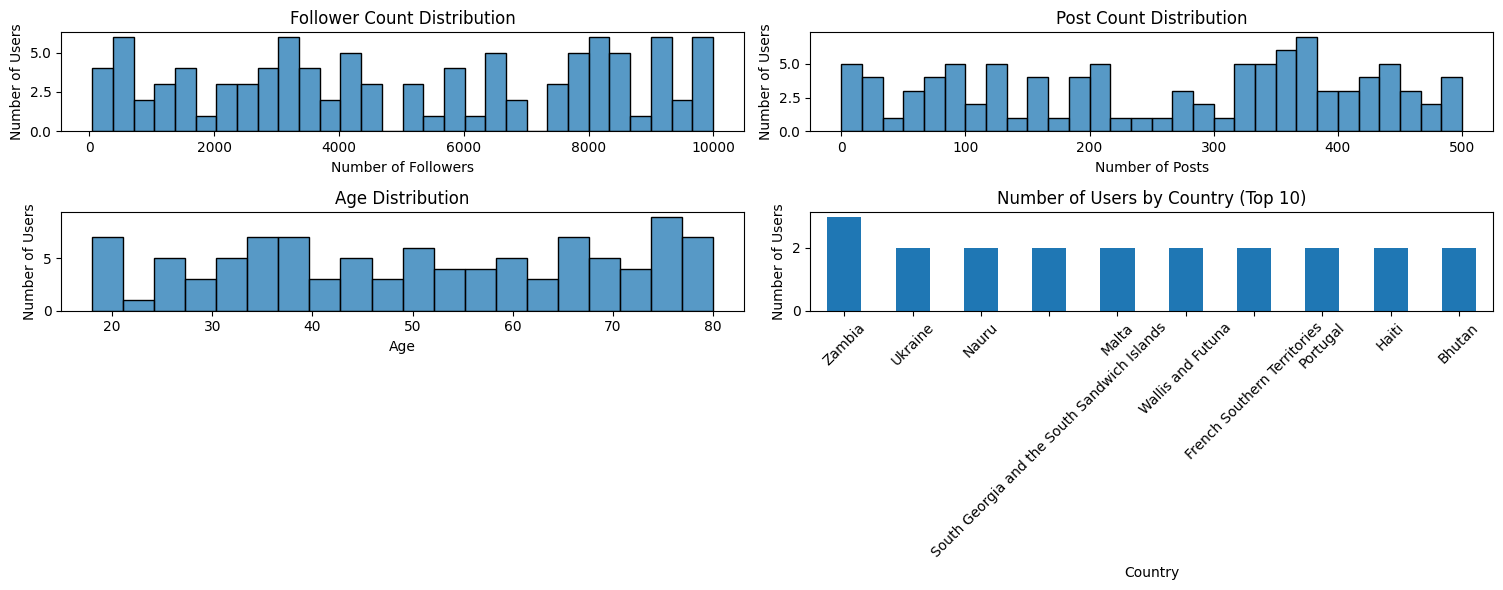


=== 활성 vs 비활성 사용자 비교 ===
활성 사용자 평균 팔로워: 5210.9
비활성 사용자 평균 팔로워: 4906.3
활성 사용자 평균 게시물: 263.7
비활성 사용자 평균 게시물: 247.4


In [18]:

# 데이터프레임 정보 확인
print("\n=== 데이터프레임 정보 ===")
print(df_users.info())

print("\n=== 처음 5개 레코드 ===")
print(df_users.head())

print("\n=== 데이터프레임 기본 통계 ===")
print(df_users.describe())

# 컬럼별 분석
print("\n=== 컬럼별 분석 ===")
print(f"활성 사용자 비율: {df_users['is_active'].mean() * 100:.1f}%")
print(f"평균 팔로워 수: {df_users['followers'].mean():.1f}")
print(f"평균 팔로잉 수: {df_users['following'].mean():.1f}")
print(f"평균 게시물 수: {df_users['posts_count'].mean():.1f}")

# 국가별 사용자 수
print("\n=== 국가별 사용자 수 (상위 10개) ===")
country_counts = df_users['country'].value_counts().head(10)
print(country_counts)

# 직업별 사용자 수
print("\n=== 직업별 사용자 수 (상위 10개) ===")
job_counts = df_users['job'].value_counts().head(10)
print(job_counts)

# 날짜 컬럼을 datetime으로 변환
df_users['created_at'] = pd.to_datetime(df_users['created_at'])
df_users['last_login'] = pd.to_datetime(df_users['last_login'])
df_users['birthdate'] = pd.to_datetime(df_users['birthdate'])

# 나이 계산
today = pd.Timestamp.now()
df_users['age'] = (today - df_users['birthdate']).dt.days // 365

print("\n=== 연령대별 분포 ===")
age_groups = pd.cut(df_users['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100],
                    labels=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대+'])
print(age_groups.value_counts().sort_index())

# 활동성 분석
df_users['days_since_signup'] = (today - df_users['created_at']).dt.days
df_users['days_since_last_login'] = (today - df_users['last_login']).dt.days
df_users['avg_posts_per_month'] = df_users['posts_count'] / (df_users['days_since_signup'] / 30)

print("\n=== 사용자 활동성 분석 ===")
print(f"평균 가입 기간: {df_users['days_since_signup'].mean():.1f}일")
print(f"평균 마지막 로그인: {df_users['days_since_last_login'].mean():.1f}일 전")
print(f"월 평균 게시물 수: {df_users['avg_posts_per_month'].mean():.2f}개")

# 데이터 시각화 (선택사항)
import matplotlib.pyplot as plt
import seaborn as sns

# Follower Distribution
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=df_users, x='followers', bins=30)
plt.title('Follower Count Distribution')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Users')

# Post Count Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df_users, x='posts_count', bins=30)
plt.title('Post Count Distribution')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users')

# Age Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df_users, x='age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')

# Users by Country (Top 10)
plt.subplot(2, 2, 4)
country_counts.plot(kind='bar')
plt.title('Number of Users by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 활성 사용자 vs 비활성 사용자 비교
active_users = df_users[df_users['is_active'] == True]
inactive_users = df_users[df_users['is_active'] == False]

print("\n=== 활성 vs 비활성 사용자 비교 ===")
print(f"활성 사용자 평균 팔로워: {active_users['followers'].mean():.1f}")
print(f"비활성 사용자 평균 팔로워: {inactive_users['followers'].mean():.1f}")
print(f"활성 사용자 평균 게시물: {active_users['posts_count'].mean():.1f}")
print(f"비활성 사용자 평균 게시물: {inactive_users['posts_count'].mean():.1f}")

### Perform CRUD Operations:
- Write Python functions to perform CRUD operations.
- For example, you can create a function to add a post for a user and update the user’s list of posts.

### Denormalization:
- Denormalization can improve performance in a **NoSQL database**.
- For instance, you might store a user’s posts within the user’s document rather than creating a separate collection.

### Outcome
- By completing this project, you’ll gain a basic understanding of NoSQL databases and their use cases.

- You’ll also become more skilled in using Python to interact with MongoDB and model data for scalable, distributed applications.

# <font color='orange'> **Project 3: Building a Machine Learning Model for Predictive Analytics**

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier()

In [21]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
X = [[1,2,3], [11,12,13]]

# X = np.array(X)
# X = pd.DataFrame(X)

y=[0,1]

In [23]:
clf.fit(X,y)

RandomForestClassifier()

In [24]:
clf

RandomForestClassifier()

In [25]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
clf.predict([[4,5,6]])

array([0])

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()

In [28]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
tf = pd.DataFrame(iris.data, columns=iris.feature_names)
tf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
tf['target'] = iris.target
tf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
# prompt: train test로 구분하라

from sklearn.model_selection import train_test_split

# Assuming 'tf' is your DataFrame with features and target variable 'target'
X = tf.drop('target', axis=1)
y = tf.target

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for training and evaluation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [33]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_predict = clf.predict(X_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [36]:
import numpy as np

np.isclose(y_predict, y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

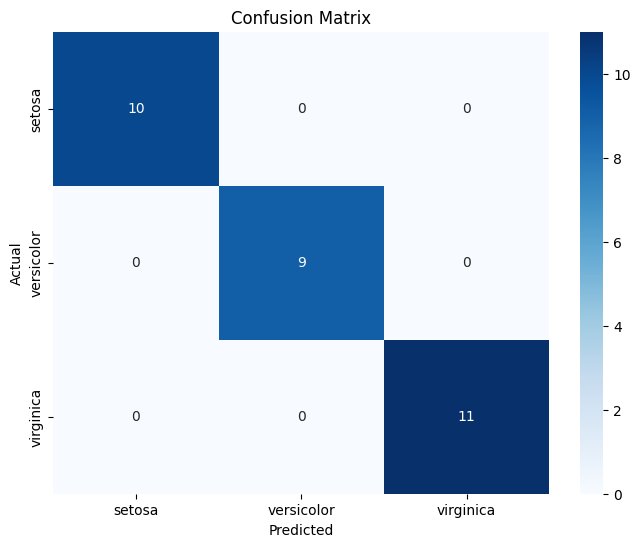

In [37]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_predict are already defined from the previous code
cm = confusion_matrix(y_predict, y_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
